In [1]:

# Kaynak : https://www.cy-magnetics.com/PullForce-DiscMagnets.htm
# Bu kod, yukarıdaki kaynaktaki formül ve algoritmayı kullanarak, iki disk mıknatıs arasındaki kuvveti hesaplar.

import math

N_disk = 30
pull_or_push = 1


def func_integral_simpson_disk(lo, hi, func):
    step = (hi - lo) / N_disk

    result1 = 0.0
    x = lo
    for i in range(1, N_disk):
        x += step
        result1 += func(x)

    result1 *= 2

    result2 = 0.0
    x = lo + step / 2
    for i in range(N_disk):
        result2 += func(x)
        x += step

    result2 *= 4

    result = result1 + result2 + func(lo) + func(hi)
    result *= step / 6
    return result


def ring_magnet_seta(seta, Z0, Z, R1, R2):
    x1 = R2 / math.sqrt(2)
    y1 = R2 / math.sqrt(2)
    K1 = ((x1 - R1 * math.cos(seta))**2 +
          (y1 - R1 * math.sin(seta))**2 +
          (Z - Z0)**2)
    K = math.pow(K1, 1.5)
    D = (R1 * (Z - Z0) * math.sin(seta)) / K
    return D


def integral_first_B(Z0, Z, R1, R2):
    return func_integral_simpson_disk(0, 2 * math.pi,
                                      lambda seta: ring_magnet_seta(seta, Z0, Z, R1, R2))


def integral_second_B(Z, R1, R2, Br, L1):
    return (Br / (4 * math.pi) *
            func_integral_simpson_disk(0, L1,
                                       lambda Z0: integral_first_B(Z0, Z, R1, R2)))


def DFZ(Z, R2, Br, R1, L1):
    By = integral_second_B(Z, R1, R2, Br, L1)
    product = -2 * math.sqrt(2) * math.pi * By * R2 / 1000
    dF = Br / (4 * math.pi) * math.pow(10, 7) * product
    return dF


def integral_third_F_2disk(L1, L, L2, R1, R2, Br):
    return func_integral_simpson_disk(L1 + L, L1 + L + L2,
                                      lambda Z: DFZ(Z, R2, Br, R1, L1)) / 1000


def first_modify(jieguo, R1, L1):
    x = R1 / L1
    a = 0.05171
    b = 0.04518
    c = 0.9728
    M = jieguo * (a * x + b / x + c)
    return M


def calculate_force(R1, R2, L1, L2, L, Br, pull_or_push):
    global N_disk
    if L == 0 and R1 == R2 and L1 == L2:
        N_disk = 10
        result = integral_third_F_2disk(L1, L, L2, R1, R2, Br)
        result = first_modify(result, R1, L1)
        result *= 0.83
    else:
        N_disk = 30
        result = integral_third_F_2disk(L1, L, L2, R1, R2, Br)

    result = abs(result) if pull_or_push else -abs(result)
    return round(result, 2)


# Example values
R1 = 5
R2 = 5
L1 = 10
L2 = 10
L = 1
Br = 1.26
pull_or_push = 1

force = calculate_force(R1, R2, L1, L2, L, Br, pull_or_push)
print("Calculated Force:", force)


Calculated Force: 25.88


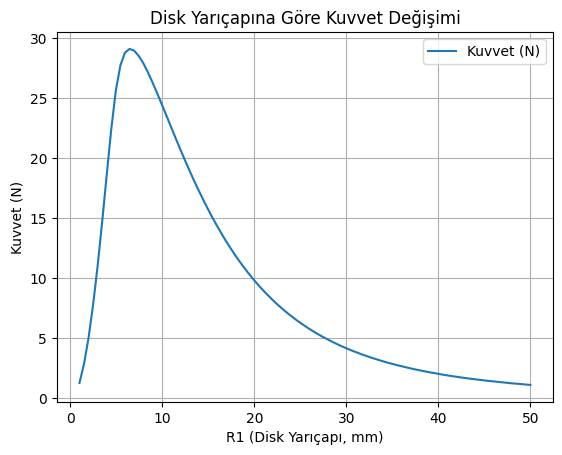

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parametre aralıklarını tanımla
R1_values = np.linspace(1, 50, 100)  # 4'ten 10'a kadar 50 farklı değer
forces = []

# Kuvvet hesaplamalarını döngüyle yap
for R1 in R1_values:
    force = calculate_force(R1, R2, L1, L2, L, Br, pull_or_push)
    forces.append(force)

# Grafiği çiz
plt.plot(R1_values, forces, label='Kuvvet (N)')
plt.xlabel('R1 (Disk Yarıçapı, mm)')
plt.ylabel('Kuvvet (N)')
plt.title('Disk Yarıçapına Göre Kuvvet Değişimi')
plt.legend()
plt.grid(True)
plt.show()


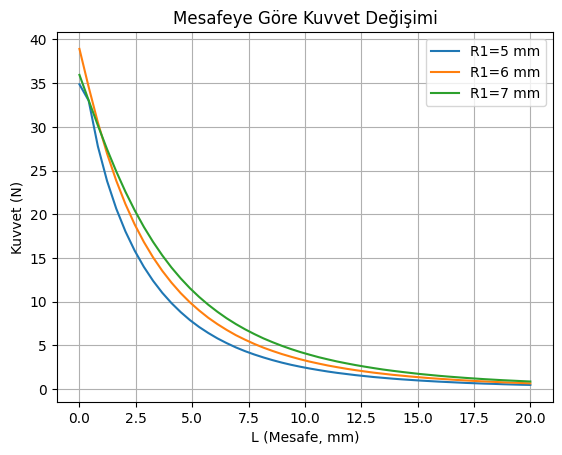

In [3]:
L_values = np.linspace(0, 20, 50)  # Mesafeler aralığı
R1_values = [5, 6, 7]  # Sabit R1 değerleri
for R1 in R1_values:
    forces = [calculate_force(R1, R2, L1, L2, L, Br, pull_or_push) for L in L_values]
    plt.plot(L_values, forces, label=f'R1={R1} mm')

plt.xlabel('L (Mesafe, mm)')
plt.ylabel('Kuvvet (N)')
plt.title('Mesafeye Göre Kuvvet Değişimi')
plt.legend()
plt.grid(True)
plt.show()


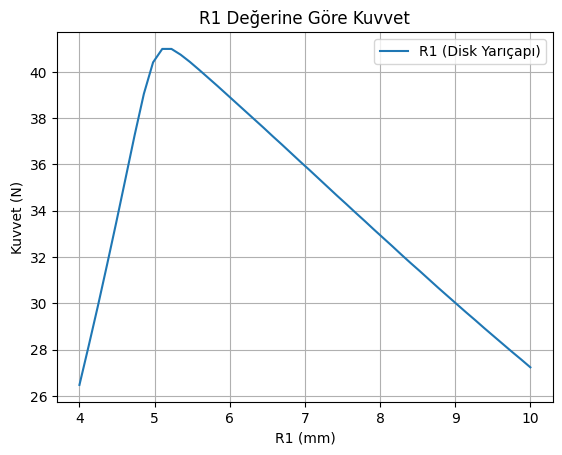

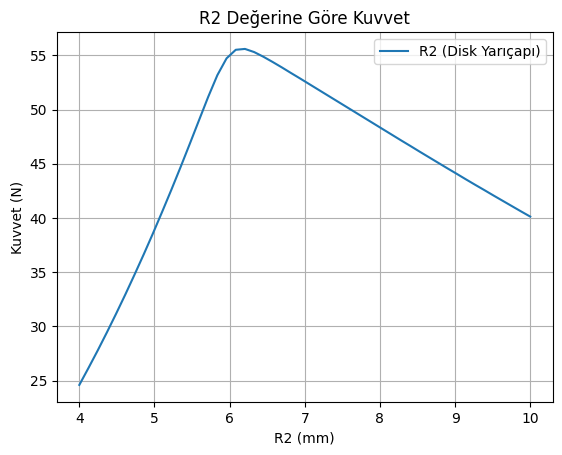

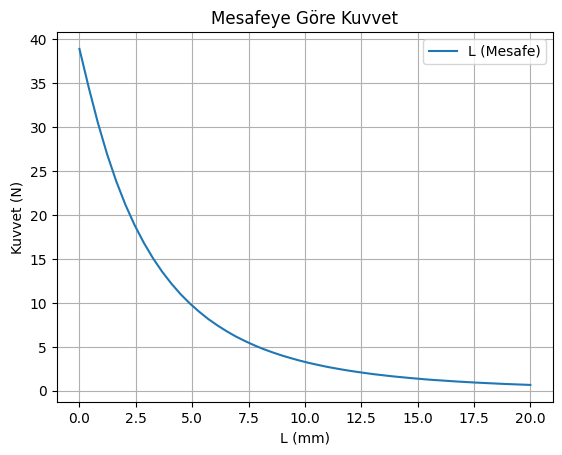

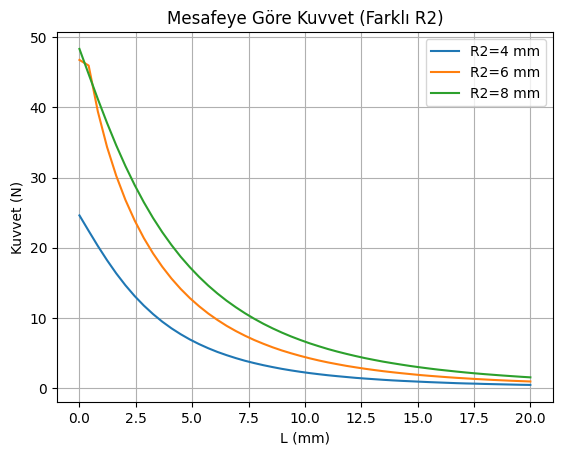

In [4]:
# Parametre aralıklarını analiz et
R1_values = np.linspace(4, 10, 50)  # R1 için değer aralığı
R2_values = np.linspace(4, 10, 50)  # R2 için değer aralığı
L_values = np.linspace(0, 20, 50)   # L (mesafe) için değer aralığı

# R1'in kuvvet üzerindeki etkisi
def analyze_R1():
    forces = [calculate_force(R1, 5, 10, 10, 0, 1.26, 1) for R1 in R1_values]
    plt.plot(R1_values, forces, label='R1 (Disk Yarıçapı)')
    plt.xlabel('R1 (mm)')
    plt.ylabel('Kuvvet (N)')
    plt.title('R1 Değerine Göre Kuvvet')
    plt.legend()
    plt.grid(True)
    plt.show()

# R2'nin kuvvet üzerindeki etkisi
def analyze_R2():
    forces = [calculate_force(6, R2, 10, 10, 0, 1.26, 1) for R2 in R2_values]
    plt.plot(R2_values, forces, label='R2 (Disk Yarıçapı)')
    plt.xlabel('R2 (mm)')
    plt.ylabel('Kuvvet (N)')
    plt.title('R2 Değerine Göre Kuvvet')
    plt.legend()
    plt.grid(True)
    plt.show()

# L'nin kuvvet üzerindeki etkisi
def analyze_L():
    forces = [calculate_force(6, 5, 10, 10, L, 1.26, 1) for L in L_values]
    plt.plot(L_values, forces, label='L (Mesafe)')
    plt.xlabel('L (mm)')
    plt.ylabel('Kuvvet (N)')
    plt.title('Mesafeye Göre Kuvvet')
    plt.legend()
    plt.grid(True)
    plt.show()

# Analizleri çağır
analyze_R1()
analyze_R2()
analyze_L()

# Kuvvetler arası karşılaştırma (Birden fazla parametre aynı anda)
def compare_parameters():
    for R2 in [4, 6, 8]:
        forces = [calculate_force(6, R2, 10, 10, L, 1.26, 1) for L in L_values]
        plt.plot(L_values, forces, label=f'R2={R2} mm')

    plt.xlabel('L (mm)')
    plt.ylabel('Kuvvet (N)')
    plt.title('Mesafeye Göre Kuvvet (Farklı R2)')
    plt.legend()
    plt.grid(True)
    plt.show()

compare_parameters()